<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 3</b>
    
Everything is correct now! Your project has passed code review. Congratulations and good luck! 😊 
      
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>
    


Thank you for the updates! I've left a few comments titled as **Reviewer's comment 2**. Please take a look :) 

     
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Michael! My name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    
    
- It's also a good idea to display several photos, since we need to understand what kind of data we have;


- You have defined train and test functions; 
     

- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. More specifically: 
  

- Please specify the `subset` parameter value in both train and test functions.     

    
- Please use regression metric.
    
    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! However, several issues need your attention. Would you please take a look at my comments? 
    
<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr>
   
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Although the main purpose of the project is to create a model, consider adding an introduction and a title to enhance readability of your project.
    
</div>

# Project 15: Using Computer Vision and Data Science to Determine Feasability of Photographs for Age Verification

In this project, I'll be using the skills I've learned in this sprint and the preceding ones to determine the overall viability of using computer vision for the supermarket chain Good Seed in determining if a camera system in the checkout area can predict customers ages well enough to sell them alcohol. Using a set of nearly 8000 images, I'll build a regression model to analyze customer photos and determine their age within a tolerance of 8 years.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great!
</div>

## Initialization

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
datagen = ImageDataGenerator(rescale = 1./255)
datagen_flow = datagen.flow_from_dataframe(dataframe = labels,
                                           directory = '/datasets/faces/final_files/',
                                           x_col = 'file_name',
                                           y_col = 'real_age',
                                           target_size = (150, 150), 
                                           batch_size = 16, 
                                           class_mode = 'raw', 
                                           seed = 2356
                                          )

Found 7591 validated image filenames.


## EDA

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Looks like we don't have any missing data, always a good start!

In [4]:
labels.duplicated().sum()

0

No duplicate data either! Let's take a closer look at our age ranges and how they're distributed

In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


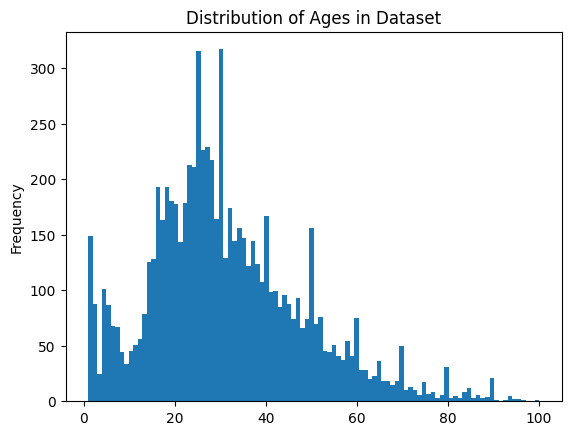

In [6]:
labels['real_age'].plot(kind = 'hist', x = 'real_age', title = 'Distribution of Ages in Dataset', bins = 100)
plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice chart 👍 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
However, I would change `Frequency` to `Number of photos`, for instance.
    
</div>

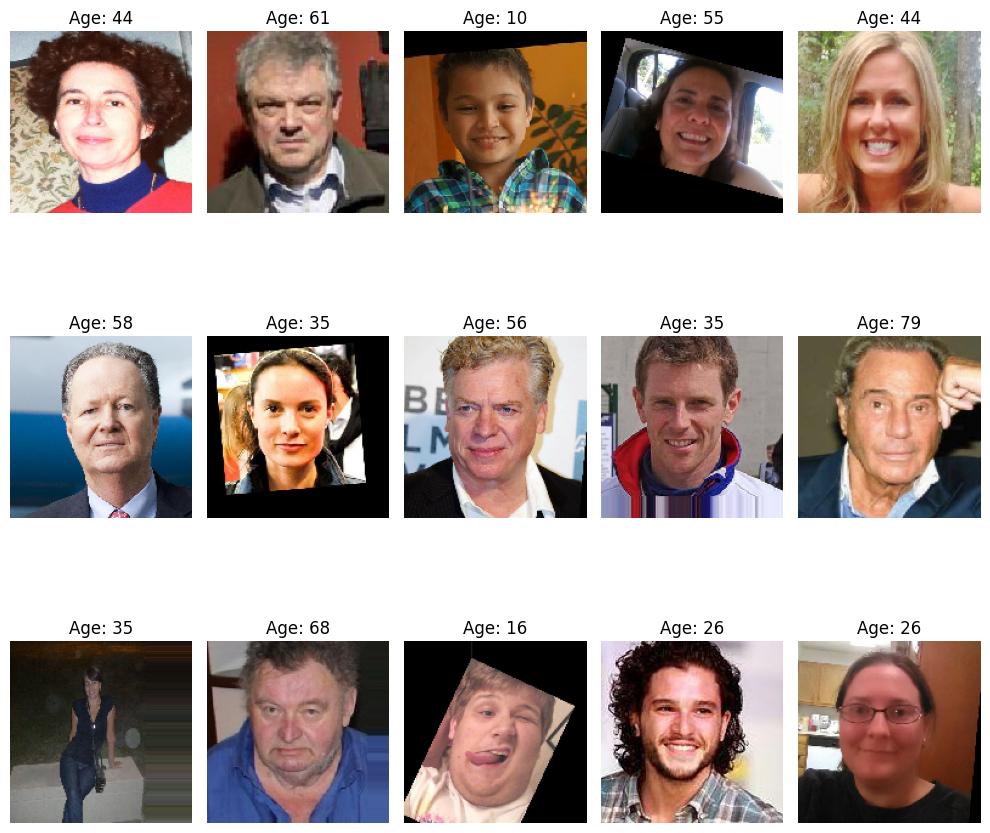

In [7]:
fig = plt.figure(figsize = (10,10))
sample_batch_images, sample_batch_ages = next(datagen_flow)

for i in range(15):
    fig.add_subplot(3, 5, i + 1)
    plt.imshow(sample_batch_images[i])
    plt.title(f'Age: {sample_batch_ages[i]:.0f}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### Findings

Out of our nearly 7600 images, the mean age of the dataset is just over 31 years old. We can confirm that the age range is realistic, as ages less than 1 and over 100 aren't present since there would be so few pictures to see of them. As expected, the number of people sadly begins falling off as they get older, and there's a large portion of the dataset that falls between the late teens and mid 30's, typically when people are most active in their lives and making memories that they may want to capture with a picture. Based on these findings, I would think our model will be trained to most often fit people within this more populated range, which contains the ages where it is legal to buy alcohol (18 and 21, depending on the country). This could, however, lead to some issues as some people may be older or younger than they appear to be in a photo, so we must be careful that the model does not overfit into this age range, especially for people younger than the legal age to purchase alcohol. Keeping the well represented range in mind, we also need to consider that the model may perform poorly outside of this range, as it may not have enough datapoints to train itself on. While this may not impact if a person is of legal drinking age, we still want the model to be as accurate as possible for all instances of its use. Looking at the graph above, I would bet that anyone under the age of 10 or over the age of 60 may not result in an accurate estimate of their age, knowing that's where our data is a bit lighter.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good conclusion.
</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [8]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [9]:
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """
    labels = pd.read_csv(path + 'labels.csv')
    train_labels, test_labels = train_test_split(labels, test_size = 0.25, random_state = 2356)
    
    train_datagen = ImageDataGenerator(rescale=1./255)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe = train_labels,
        directory = '/datasets/faces/final_files/',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'raw',
        seed = 2356,
        subset = 'training')

    return train_gen_flow

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>  Reviewer's comment </b>
    

Please specify the `subset` parameter that can be either `training` or `validation` . Otherwise, the model will use the whole dataset.  
</div>

In [10]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    labels = pd.read_csv(path + 'labels.csv')
    train_labels, test_labels = train_test_split(labels, test_size = 0.25, random_state = 2356)
    
    test_datagen = ImageDataGenerator(rescale=1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe = test_labels,
        directory = '/datasets/faces/final_files/',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size = (224, 224),
        batch_size = 32,
        class_mode = 'raw',
        seed = 2356,
        subset = 'validation')

    return test_gen_flow

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
As mentioned previously, the the `subset` parameter can be either `training` or `validation`. There's no `test` value, so the code will not work. To see available options, consider using documentation. 
</div>

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>  Reviewer's comment </b>
    

Same issue. 
</div>

In [11]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    model = Sequential()
    
    backbone = ResNet50(input_shape = input_shape, weights = 'imagenet', include_top = False)
    
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae'])

    return model

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct. 

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


Good! 
    
    
- `Dense(1)` is appropriate, since you are predicting a single value. Using 1 neuron makes sense here.
    
    
    
- While you can omit the activation or explicitly specify `linear` in the final layer, `relu` may help because age should not be negative. 
    
    
    
- Adam optimizer is a solid and commonly used choice, well done. 




</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Should we use accuracy with regression models? 
</div>

In [12]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    model.fit(train_data,
              validation_data = test_data, 
              batch_size = batch_size, 
              epochs = epochs, 
              steps_per_epoch = steps_per_epoch, 
              validation_steps = validation_steps
             )

    return model

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [13]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921

Epoch 2/20
356/356 - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035

Epoch 3/20
356/356 - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454

Epoch 4/20
356/356 - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481

Epoch 5/20
356/356 - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192

Epoch 6/20
356/356 - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332

Epoch 7/20
356/356 - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359

Epoch 8/20
356/356 - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239

Epoch 9/20
356/356 - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529

Epoch 10/20
356/356 - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629

Epoch 11/20
356/356 - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866

Epoch 12/20
356/356 - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591

Epoch 13/20
356/356 - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467

Epoch 14/20
356/356 - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401

Epoch 15/20
356/356 - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841

Epoch 16/20
356/356 - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304

Epoch 17/20
356/356 - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419

Epoch 18/20
356/356 - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226

Epoch 19/20
356/356 - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908

Epoch 20/20
356/356 - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
   

You can use Markdown cell for your code and results: 

    ```python
    
    # code
    
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921  
```

## Conclusions

Based on results from the GPU platform, we see the val_mae score fluctuates through all 20 epochs in testing. The final val_mae score is nearly double that of the training mae score, which to me could mean that our model can still be very much improved and that it's likely running into the age grouping issues noted earlier in the EDA portion. During the EDA portion of the project, I found that most of the images in our dataset are of people in their late teens to mid 30's. This finding could, and looks like did, lead the model to overfitting when presented with new data.

The lowest val_mae score came from epoch 17, but further testing from epochs 18-20 showed increased val_mae scores, a telltale sign of overfitting. If we re-ran the test but stopped at 17 epochs, I'd feel much more confident in the model, as this epoch provided the lowest MAE value of all of testing, and our customer could feel more confident as we exceeded their target by over 12%. 

A good portion of the scores were under the threshold of 8 we set for the project, so I feel confident in the results, but they certainly leave room for improvement. Model improvements could come from cutting off testing a bit earlier, working with a more evenly distributed dataset, and increasing our number of images used to help further decrease MAE. Overall, this is a good starting point for future developments into computer vision for applications just like this one.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Very good! 

</div>


# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training